# Clustering for Better Performance in Marketing Campaign 

Dataset : [Marketing Campaign Analysis](https://drive.google.com/file/d/19TUlAkMBRQi4MKfimeYBxCrFSeYk0ZGr/view)



### Import Data 

In [ ]:
#Library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# To Display Output without max columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Define Dataset 
df = pd.read_csv('/content/drive/MyDrive/Gcollab /marketing_campaign_data.csv', delimiter=',')

In [ ]:
# developer-friendly columns name 
df.columns = [x.lower().replace(' ', '_').replace('-', '_') for x in df.columns.to_list()]

df.sample(5)

,unnamed:_0,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntcoke,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
1342,1342,873,1949,S2,Menikah,62845000.0,1,1,01-10-2012,3,1099000,0,45000,0,0,34000,11,3,4,10,8,0,1,0,0,0,0,3,11,1
1807,1807,3130,1964,S1,Lajang,18701000.0,1,1,04-06-2013,95,12000,4000,2000,10000,6000,10000,4,2,0,4,5,0,0,0,0,0,0,3,11,0
650,650,4248,1960,S2,Lajang,98777000.0,0,0,17-02-2014,23,1000000,19000,711000,125000,115000,38000,0,4,6,9,1,0,1,0,0,0,0,3,11,0
738,738,6516,1989,SMA,Menikah,17487000.0,1,0,18-03-2013,37,0,0,1000,7000,4000,6000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
594,594,3075,1972,S3,Menikah,59973000.0,0,0,11-09-2013,47,130000,30000,168000,20000,34000,0,1,3,4,7,1,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis 

### Descriptive Analysis 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unnamed:_0           2240 non-null   int64  
 1   id                   2240 non-null   int64  
 2   year_birth           2240 non-null   int64  
 3   education            2240 non-null   object 
 4   marital_status       2240 non-null   object 
 5   income               2216 non-null   float64
 6   kidhome              2240 non-null   int64  
 7   teenhome             2240 non-null   int64  
 8   dt_customer          2240 non-null   object 
 9   recency              2240 non-null   int64  
 10  mntcoke              2240 non-null   int64  
 11  mntfruits            2240 non-null   int64  
 12  mntmeatproducts      2240 non-null   int64  
 13  mntfishproducts      2240 non-null   int64  
 14  mntsweetproducts     2240 non-null   int64  
 15  mntgoldprods         2240 non-null   i

In [ ]:
df.isna().sum()

unnamed:_0              0
id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntcoke                 0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# to Transform dataType
df['dt_customer'] = pd.to_datetime(df['dt_customer'])


#Pick and Separate Columns by dataType
#Numerical 
num_dtypes = ['int64', 'float64']
num_df = df.select_dtypes(include=num_dtypes)
numeric = num_df.columns

print(numeric)

#Categorical
cat_df = df.select_dtypes(include='object')
categoric = cat_df.columns

print(categoric)

#Datetime
timesrs_df = df.select_dtypes(include='datetime64[ns]')
timesrs = timesrs_df.columns

print(timesrs)

Index(['unnamed:_0', 'id', 'year_birth', 'income', 'kidhome', 'teenhome',
       'recency', 'mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact',
       'z_revenue', 'response'],
      dtype='object')
Index(['education', 'marital_status'], dtype='object')
Index(['dt_customer'], dtype='object')


<ipython-input-6-996828f53253>:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['dt_customer'] = pd.to_datetime(df['dt_customer'])
<ipython-input-6-996828f53253>:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['dt_customer'] = pd.to_datetime(df['dt_customer'])
<ipython-input-6-996828f53253>:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['dt_customer'] = pd.to_datetime(df['dt_customer'])
<ipython-input-6-996828f53253>:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['dt_customer'] = pd.to_datetime(df['dt_customer'])
<ipython-input-6-996828f53253>:2: UserWarning: Parsing '15-11-2013' in DD/MM/YYYY format. Provide format or 

In [ ]:
# Check Value for each Columns -- Check Invalid Data 

for x in df.columns.to_list() : 
  print(x + '=')
  print(df[x].sort_values().unique())
  print('')

unnamed:_0=
[   0    1    2 ... 2237 2238 2239]

id=
[    0     1     9 ... 11187 11188 11191]

year_birth=
[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]

education=
['D3' 'S1' 'S2' 'S3' 'SMA']

marital_status=
['Bertunangan' 'Cerai' 'Duda' 'Janda' 'Lajang' 'Menikah']

income=
[1.73000e+06 2.44700e+06 3.50200e+06 ... 1.62397e+08 6.66666e+08
         nan]

kidhome=
[0 1 2]

teenhome=
[0 1 2]

dt_customer=
['2012-01-08T00:00:00.000000000' '2012-01-09T00:00:00.000000000'
 '2012-01-10T00:00:00.000000000' '2012-01-11T00:00:00.000000000'
 '2012-01-12T00:00:00.000000000' '2012-02-08T00:00:00.000000000'
 '2012-02-09T00:00:00.000000000' '2012-02-10T00:00:00.000000000'
 '2012-02-11T00:00:00.000000000' '2012-02-12T00:00:00.000000000'
 '2012-03-08

In [ ]:
df[numeric].describe()

,unnamed:_0,id,year_birth,income,kidhome,teenhome,recency,mntcoke,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df[numeric].describe()

,unnamed:_0,id,year_birth,income,kidhome,teenhome,recency,mntcoke,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
for y in categoric : 
  print(f'''value counts column {y} : ''')
  print(df[y].value_counts())
  print()

value counts column education : 
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: education, dtype: int64

value counts column marital_status : 
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: marital_status, dtype: int64



#### Kesimpulan 

1. Duplicated Data 0 
2. Missing values 1.07% di column income 

### Feature Engineering 

In [ ]:
#Delete Duplicates and Missing Values 
#df.drop_duplicates()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   unnamed:_0           2216 non-null   int64         
 1   id                   2216 non-null   int64         
 2   year_birth           2216 non-null   int64         
 3   education            2216 non-null   object        
 4   marital_status       2216 non-null   object        
 5   income               2216 non-null   float64       
 6   kidhome              2216 non-null   int64         
 7   teenhome             2216 non-null   int64         
 8   dt_customer          2216 non-null   datetime64[ns]
 9   recency              2216 non-null   int64         
 10  mntcoke              2216 non-null   int64         
 11  mntfruits            2216 non-null   int64         
 12  mntmeatproducts      2216 non-null   int64         
 13  mntfishproducts      2216 non-nul

In [ ]:
# Make feature Age and category of age
df['age'] = 2023 - df['year_birth']

# Make feature category of age
cat_age=[]
for x in df['age']: 
  if x < 13 : 
    cat_age.append('kids')
  elif x < 25 : 
    cat_age.append('young')
  elif x < 45 : 
    cat_age.append('adult')
  else : 
    cat_age.append('elderly')

df['ctg_age'] = cat_age

# Make feature total accepted campaign and conversion rate (cvr)
df['totalacceptedcampaign'] = df['acceptedcmp1'] + df['acceptedcmp2'] + 
                              df['acceptedcmp3'] + df['acceptedcmp4'] + 
                              df['acceptedcmp5'] 

# Make feature total spent 
df['totalspent'] = df['mntcoke'] +	df['mntfruits'] +	
                    df['mntmeatproducts'] +	df['mntfishproducts'] +	
                    df['mntsweetproducts'] +	df['mntgoldprods'] 

#Make feature total transaction 
df['totaltransaction'] = df['numdealspurchases'] + df['numwebpurchases'] +
                          df['numcatalogpurchases'] + df['numstorepurchases'] 

# Make feature total dependent 
df['totaldependent'] = df['kidhome'] + df['teenhome'] 

# Make feature cvr 
def safe_div(x, y):
  #bertujuan untuk menangani /0 pada cvr jika total numwebvisitsmonthnya 0 
    if y == 0 : 
        return 0 
    return x / y 

df['cvr'] = df.apply(lambda x: safe_div(x['totaltransaction'], x['numwebvisitsmonth']), axis = 1)

df.sample(3)

,unnamed:_0,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntcoke,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,ctg_age,totalacceptedcampaign,totalspent,totaltransaction,totaldependent,cvr
589,589,4179,1959,S1,Bertunangan,24221000.0,0,0,2013-08-20,94,8000,9000,9000,2000,5000,22000,1,1,1,3,4,0,0,0,0,0,0,3,11,0,64,elderly,0,55000,6,0,1.5
474,474,9081,1988,S1,Lajang,20518000.0,1,0,2014-05-18,58,4000,1000,6000,4000,1000,9000,1,1,1,2,5,0,0,0,0,0,0,3,11,0,35,adult,0,25000,5,1,1.0
1726,1726,10905,1955,S1,Bertunangan,42586000.0,1,1,2012-10-29,7,194000,2000,56000,0,0,0,5,4,1,6,8,0,0,0,0,0,0,3,11,1,68,elderly,0,252000,16,2,2.0


### Feature Enconding 


In [ ]:
# Feature label encoding for columns 
mapping_marital = {
    'Menikah' : 'Together',
    'Bertunangan' : 'Together',
    'Lajang' : 'Alone',
    'Cerai' : 'Alone',
    'Janda' : 'Alone',
    'Duda' : 'Alone',
}

df['marital_status'] = df['marital_status'].map(mapping_marital)

# Feature one-hot-encoding for columns 
prefix_maritalstatus = pd.get_dummies(df['marital_status'], prefix='is')
prefix_educ = pd.get_dummies(df['education'], prefix='is')
prefix_ctg_age = pd.get_dummies(df['ctg_age'], prefix='is')

df = df.join(prefix_maritalstatus)
df = df.join(prefix_educ)
df = df.join(prefix_ctg_age)

df.sample(3)

  

,unnamed:_0,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntcoke,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,ctg_age,totalacceptedcampaign,totalspent,totaltransaction,totaldependent,cvr,is_Alone,is_Together,is_D3,is_S1,is_S2,is_S3,is_SMA,is_adult,is_elderly
1440,1440,5967,1952,S1,Together,33402000.0,1,1,2013-07-18,60,26000,2000,19000,10000,5000,8000,3,2,1,3,8,0,0,0,0,0,0,3,11,0,71,elderly,0,70000,9,2,1.125000,0,1,0,1,0,0,0,0,1
1202,1202,3602,1958,S2,Together,51412000.0,0,1,2013-12-31,42,140000,3000,29000,4000,5000,14000,2,3,2,4,4,0,0,0,0,0,0,3,11,0,65,elderly,0,195000,11,1,2.750000,0,1,0,0,1,0,0,0,1
1757,1757,3524,1971,S2,Alone,39763000.0,1,0,2013-04-08,9,80000,1000,60000,4000,6000,16000,2,5,1,2,9,0,0,0,0,0,0,3,11,1,52,elderly,0,167000,10,1,1.111111,1,0,0,0,1,0,0,0,1


### Insight 

In [ ]:
dataset = df.copy()


#Pick and Separate Columns by dataType
#Numerical 
num_dtypes = ['int64', 'float64']
num_df = dataset.select_dtypes(include=num_dtypes)
numerics = num_df.columns

print(numerics)

#Categorical
cat_df = dataset.select_dtypes(include='object')
categorics = cat_df.columns

print(categorics)

#Datetime
timesrs_df = dataset.select_dtypes(include='datetime64[ns]')
timeprd = timesrs_df.columns

print(timeprd)

Index(['unnamed:_0', 'id', 'year_birth', 'income', 'kidhome', 'teenhome',
       'recency', 'mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact',
       'z_revenue', 'response', 'age', 'totalacceptedcampaign', 'totalspent',
       'totaltransaction', 'totaldependent', 'cvr'],
      dtype='object')
Index(['education', 'marital_status', 'ctg_age'], dtype='object')
Index(['dt_customer'], dtype='object')


In [ ]:
dataset[numerics].describe()

,unnamed:_0,id,year_birth,income,kidhome,teenhome,recency,mntcoke,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,totalacceptedcampaign,totalspent,totaltransaction,totaldependent,cvr
count,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000
mean,1121.867329,5588.353339,1968.820397,5.224725e+07,0.441787,0.505415,49.012635,3.050916e+05,26356.046931,1.669959e+05,37637.635379,27028.880866,43965.252708,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,54.179603,0.298285,6.070754e+05,14.880866,0.947202,4.390755
std,643.164161,3249.376275,11.985554,2.517308e+07,0.536896,0.544181,28.948352,3.373279e+05,39793.916518,2.242833e+05,54752.082415,41072.045667,51815.414374,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,0.679209,6.029005e+05,7.670957,0.749062,4.888816
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,566.750000,2814.750000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.400000e+04,2000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,0.000000,6.900000e+04,8.000000,0.000000,1.222222
50%,1120.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.745000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24500.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,0.000000,3.965000e+05,15.000000,1.000000,2.612500
75%,1678.250000,8421.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.050000e+05,33000.000000,2.322500e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000,0.000000,1.048000e+06,21.000000,1.000000,5.400000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,262000.000000,321000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,4.000000,2.525000e+06,44.000000,3.000000,43.000000


In [ ]:
dataset[categorics].describe()

,education,marital_status,ctg_age
count,2216,2216,2216
unique,5,2,2
top,S1,Together,elderly
freq,1116,1430,1744


<Axes: >

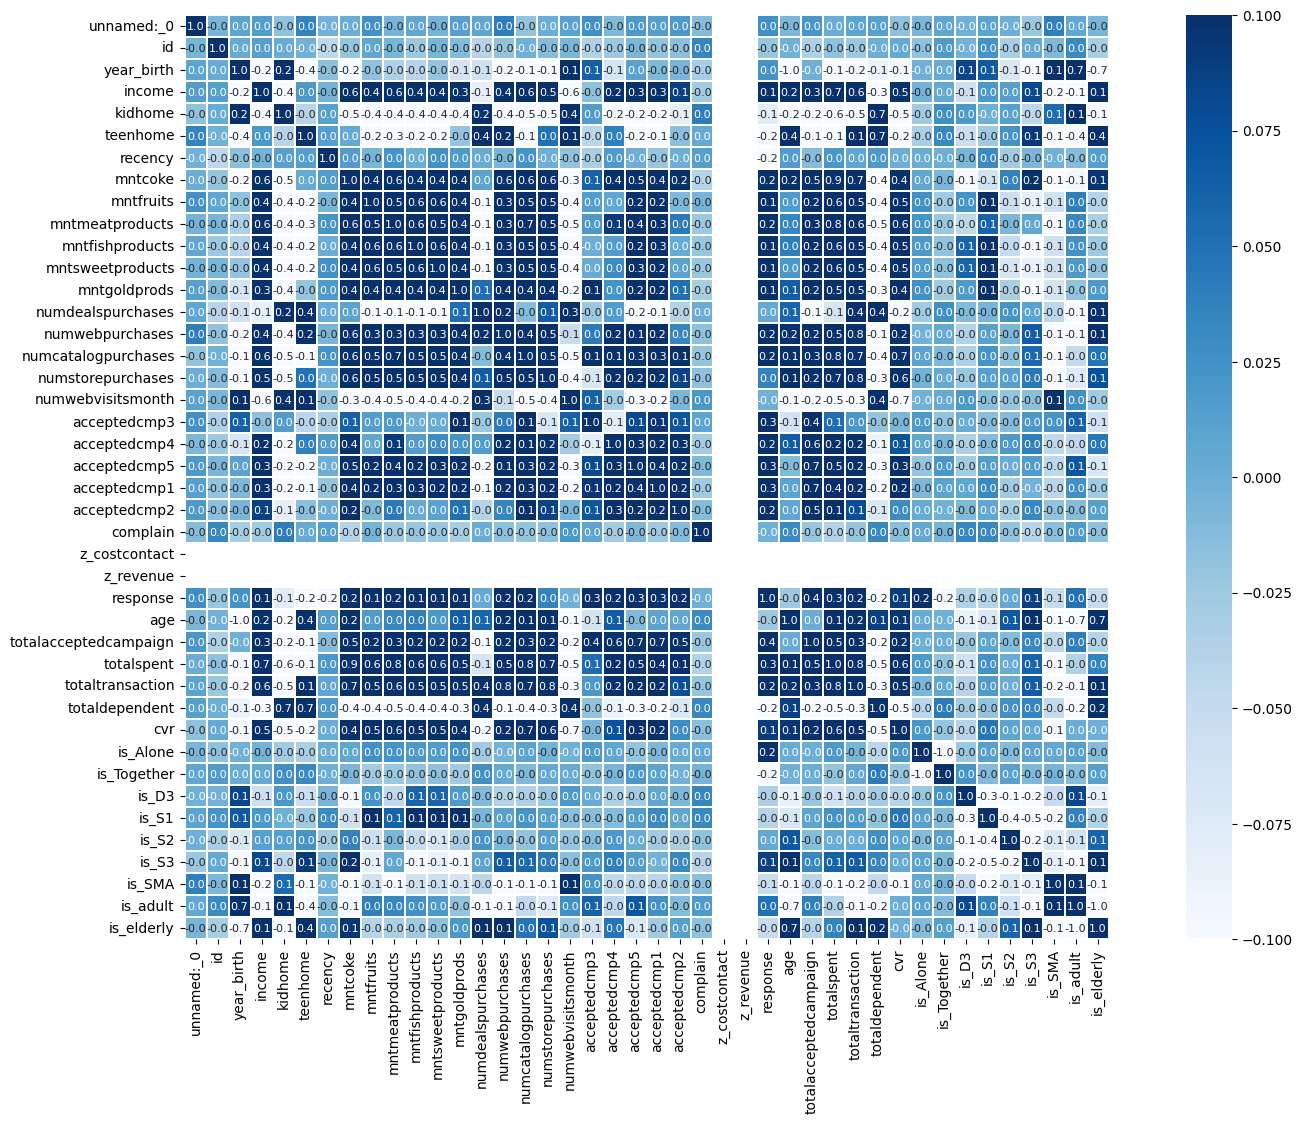

In [ ]:
# correlation heatmap
plt.figure(figsize=(20, 12))
corrmat = dataset.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

#### Inisiasi Code Visualization 


In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
plt.style.use("fivethirtyeight")
from matplotlib.ticker import FuncFormatter 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

(0.0, 120000000.0)

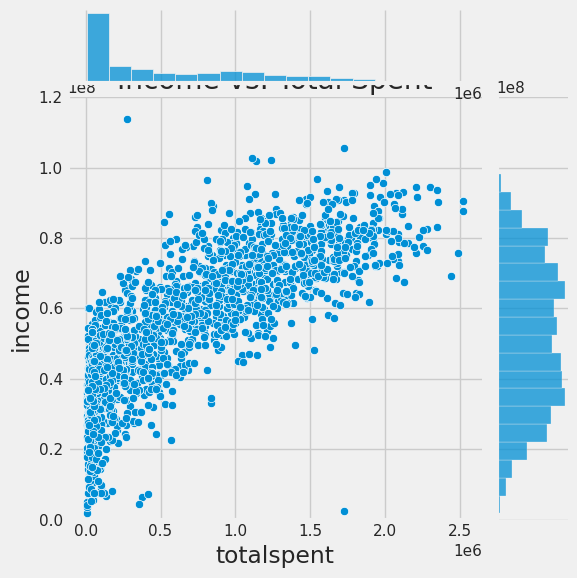

In [ ]:
plot = sns.jointplot(x=dataset["totalspent"], y=dataset["income"])
plt.title('Income vs. Total Spent')
plot.ax_marg_y.set_ylim(0, 120000000)

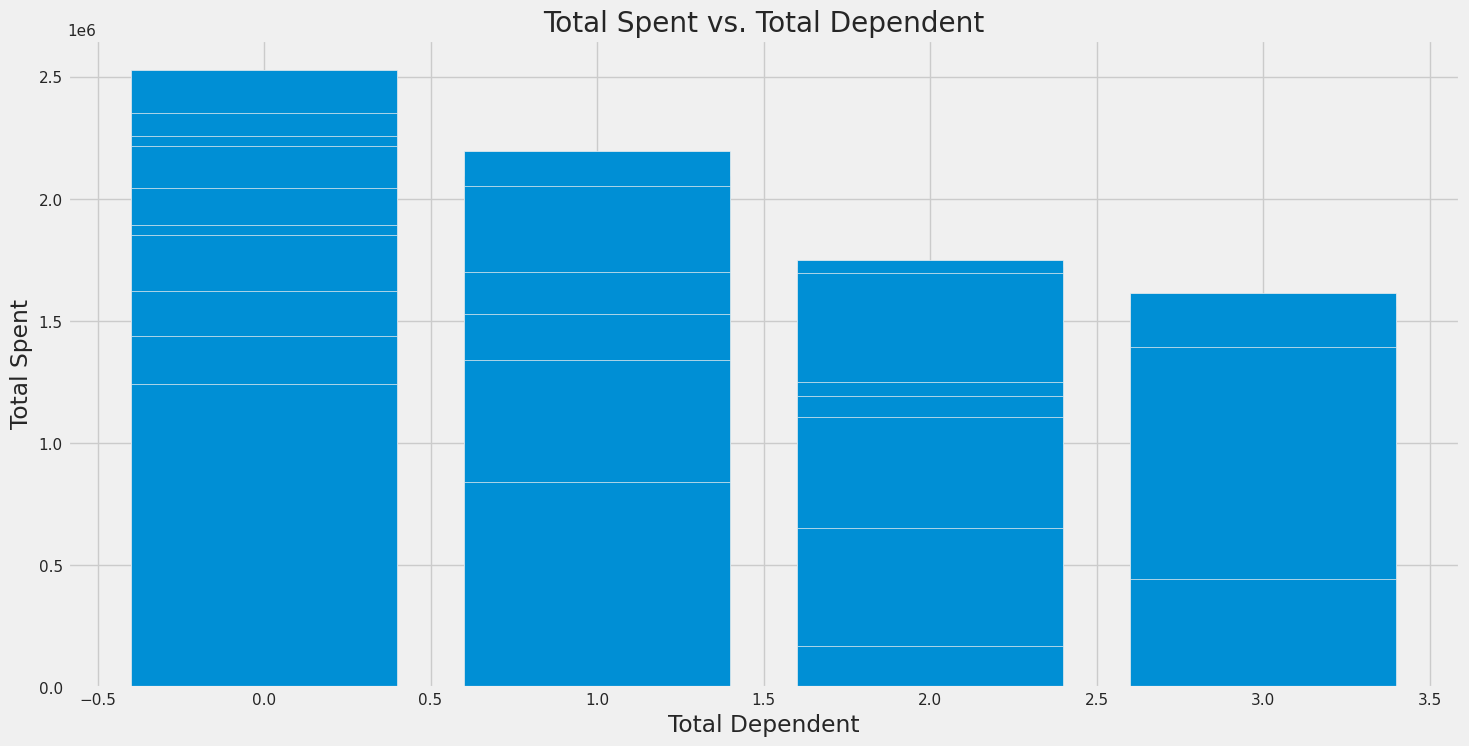

In [ ]:
plt.bar(dataset['totaldependent'], dataset['totalspent'])
plt.title("Total Spent vs. Total Dependent")
plt.xlabel("Total Dependent")
plt.ylabel("Total Spent")
plt.show()

### Feature Standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler
dataset_scaled = dataset.copy()
ss = StandardScaler()

for col in numerics:
    dataset_scaled[col] = ss.fit_transform(dataset_scaled[[col]])
    
display(dataset_scaled.shape, dataset_scaled.head(3))

(2216, 46)

,unnamed:_0,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntcoke,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,age,ctg_age,totalacceptedcampaign,totalspent,totaltransaction,totaldependent,cvr,is_Alone,is_Together,is_D3,is_S1,is_S2,is_S3,is_SMA,is_adult,is_elderly
0,-1.744688,-0.019809,-0.986443,S1,Alone,0.234063,-0.823039,-0.928972,2012-04-09,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,0.986443,elderly,-0.439265,1.675488,1.319446,-1.264803,-0.167630,1,0,0,1,0,0,0,0,1
1,-1.743132,-1.051009,-1.236801,S1,Alone,-0.234559,1.039938,0.909066,2014-08-03,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.236801,elderly,-0.439265,-0.962358,-1.157987,1.405806,-0.652811,1,0,0,1,0,0,0,0,1
2,-1.741577,-0.445526,-0.318822,S1,Together,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0.318822,elderly,-0.439265,0.280250,0.797881,-1.264803,0.175797,0,1,0,1,0,0,0,0,1


## Model for Clustering and Evaluation 

### Elbhow Method 

In [ ]:
# Data yang digunakan adalah kecuali feature yang didelete 
X = dataset_scaled.drop(columns=['marital_status', 'education', 'year_birth', 'id', 'kidhome', 'teenhome', 'unnamed:_0', 'complain', 'z_costcontact', 'z_revenue', 'dt_customer', 'ctg_age', 'mntcoke', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']).copy()


In [ ]:
X.sample(3)

,income,recency,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,age,totalacceptedcampaign,totalspent,totaltransaction,totaldependent,cvr,is_Alone,is_Together,is_D3,is_S1,is_S2,is_S3,is_SMA,is_adult,is_elderly
1464,-0.960578,-1.347968,-0.688176,-1.125881,-0.912837,-0.861830,0.693232,-0.420530,-1.433683,-0.439265,-0.929178,-1.288378,0.070501,-0.752186,0,1,0,0,1,0,0,1,0
543,1.268377,-1.382520,-0.688176,1.063634,1.137692,0.061232,-0.956381,2.377952,-1.099872,2.506003,2.176513,0.667490,-1.264803,0.465639,0,1,0,0,0,1,0,1,0
343,0.279916,0.759709,-0.168231,-0.396043,0.795937,0.676607,-0.956381,-0.420530,1.570611,-0.439265,-0.166027,0.406708,0.070501,0.329243,0,1,0,0,0,1,0,0,1


In [ ]:
X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   income                 2216 non-null   float64
 1   recency                2216 non-null   float64
 2   numdealspurchases      2216 non-null   float64
 3   numwebpurchases        2216 non-null   float64
 4   numcatalogpurchases    2216 non-null   float64
 5   numstorepurchases      2216 non-null   float64
 6   numwebvisitsmonth      2216 non-null   float64
 7   response               2216 non-null   float64
 8   age                    2216 non-null   float64
 9   totalacceptedcampaign  2216 non-null   float64
 10  totalspent             2216 non-null   float64
 11  totaltransaction       2216 non-null   float64
 12  totaldependent         2216 non-null   float64
 13  cvr                    2216 non-null   float64
 14  is_Alone               2216 non-null   uint8  
 15  is_T

[24834.722503287907, 21894.768713587233, 20432.72431235377, 19393.23619522192, 18393.184707367735, 17663.537806102177, 17118.010400950818, 16677.020646703346]


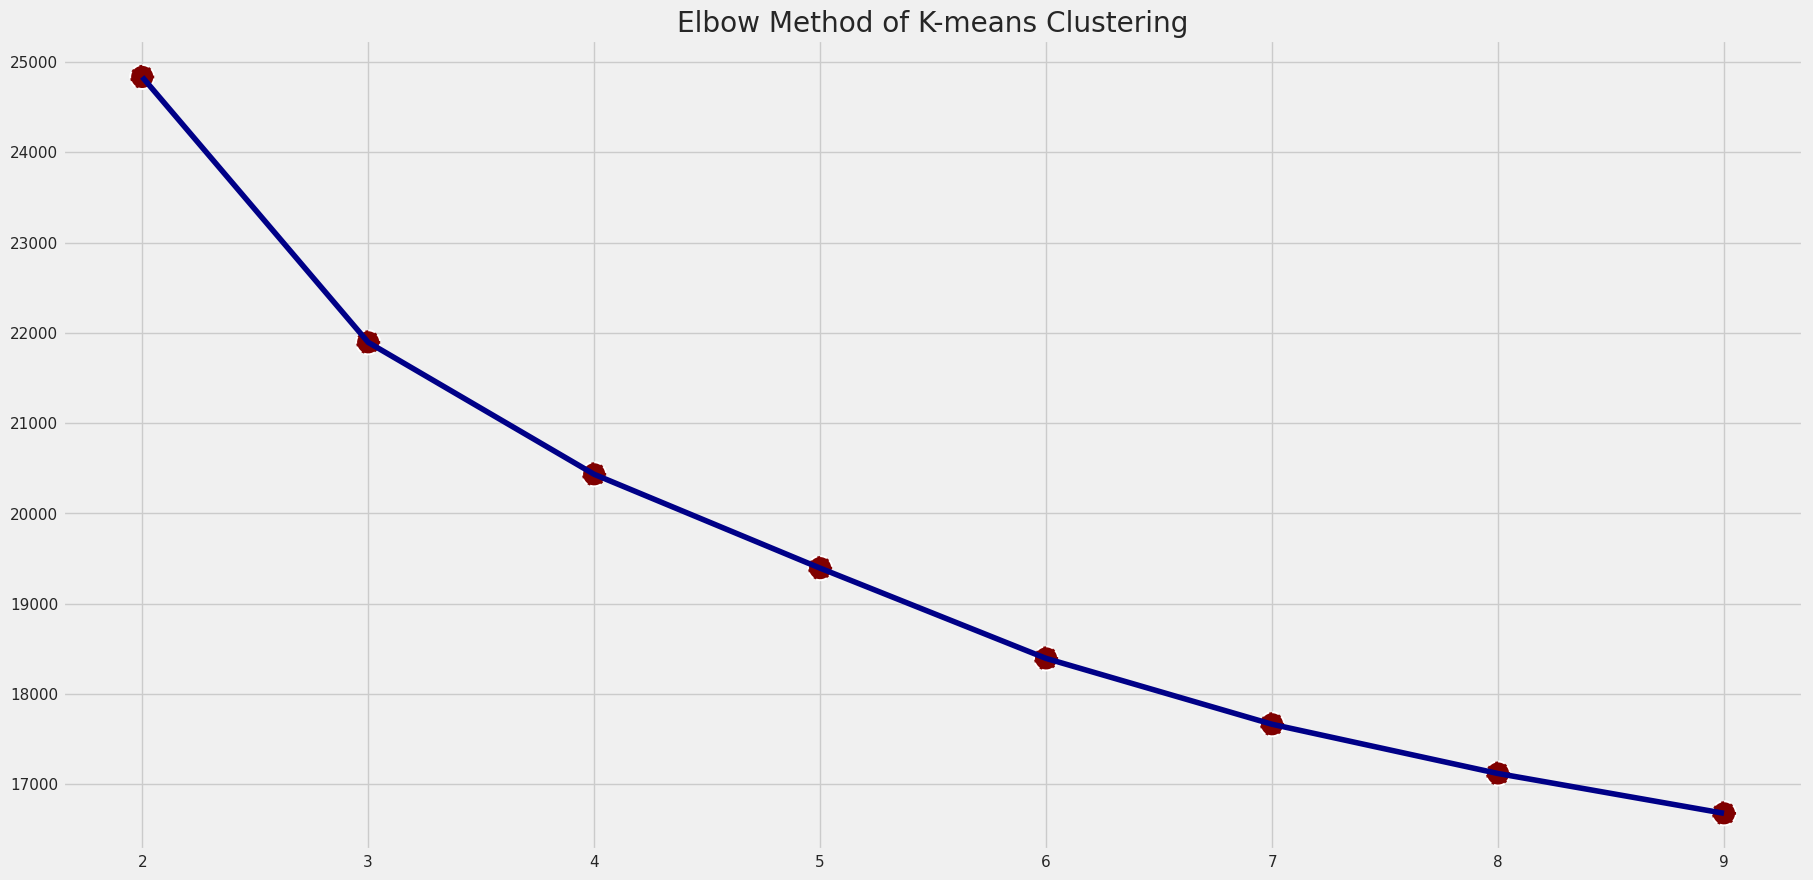

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 10), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

### Modelling K-Means 


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
dataset['cluster'] = kmeans.labels_ #Menempelkan kembali di data yang digunakan 

<Axes: xlabel='totalspent', ylabel='income'>

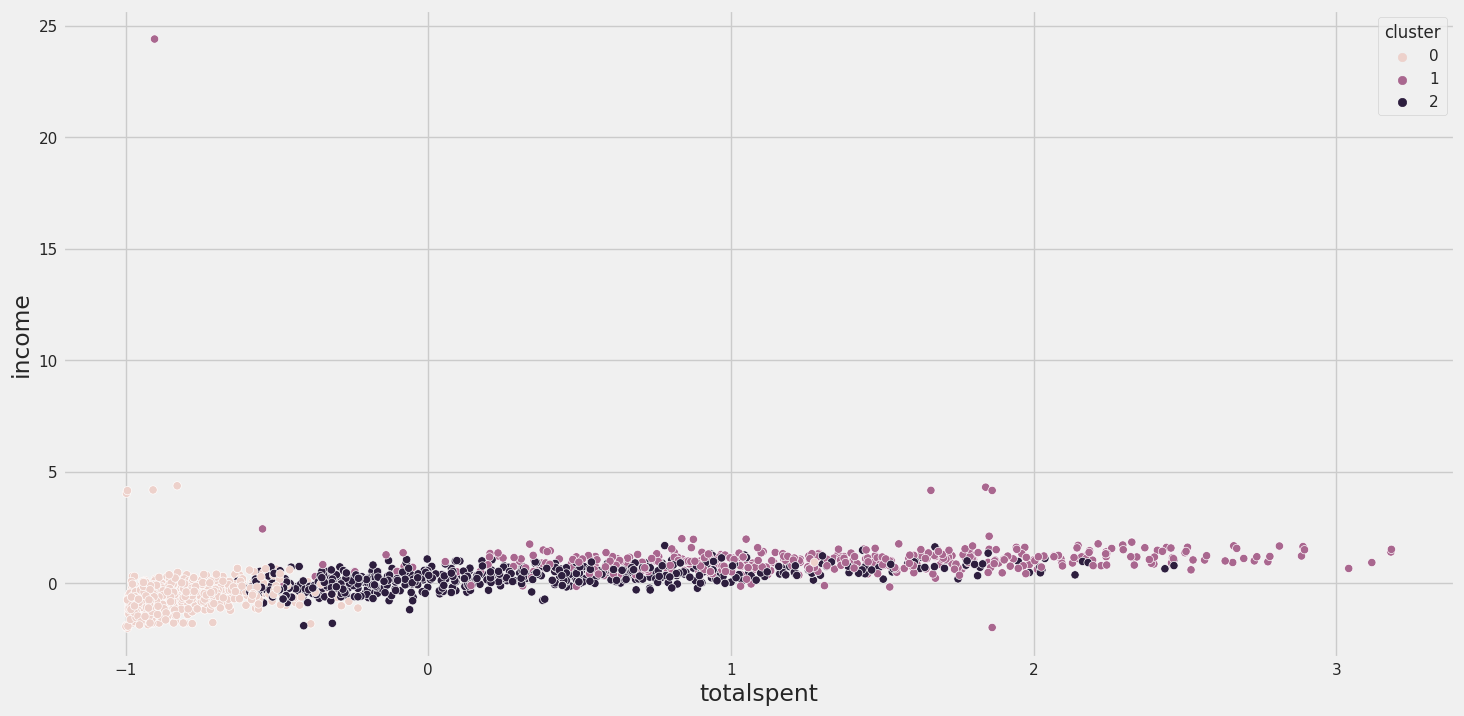

In [ ]:
sns.scatterplot(data = X, x='totalspent', y='income', hue='cluster')

### Sillhouette Score : For Evaluation Cluster Modelling 


In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

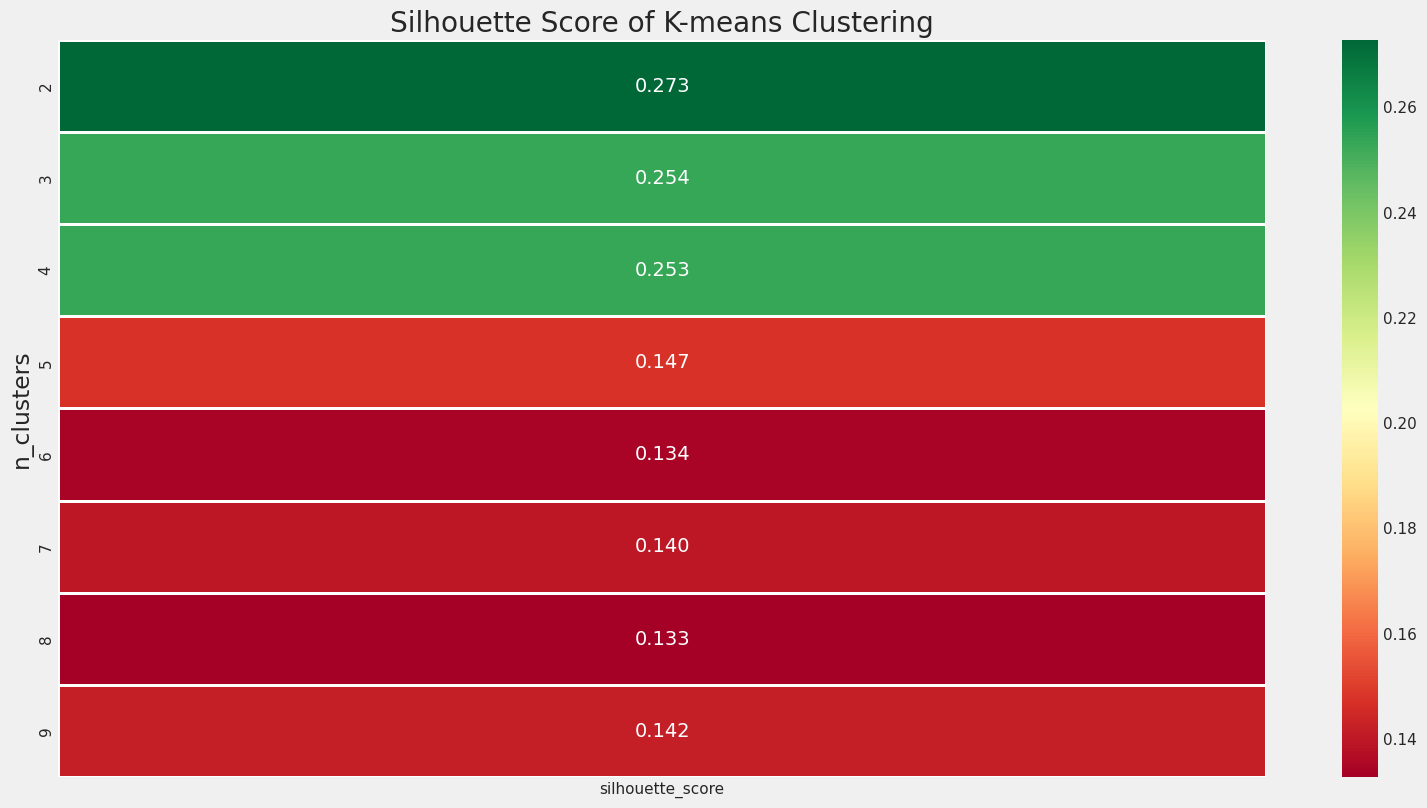

In [ ]:
visualize_silhouette_layer(X)

## Interpretation and Business Recommendation 

### Interpretation 

In [ ]:
sns.pairplot(data=dataset, hue='cluster')

In [ ]:
X.columns 

Index(['income', 'recency', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'response', 'age', 'totalacceptedcampaign', 'totalspent',
       'totaltransaction', 'totaldependent', 'cvr', 'is_Alone', 'is_Together',
       'is_D3', 'is_S1', 'is_S2', 'is_S3', 'is_SMA', 'is_adult', 'is_elderly',
       'cluster'],
      dtype='object')

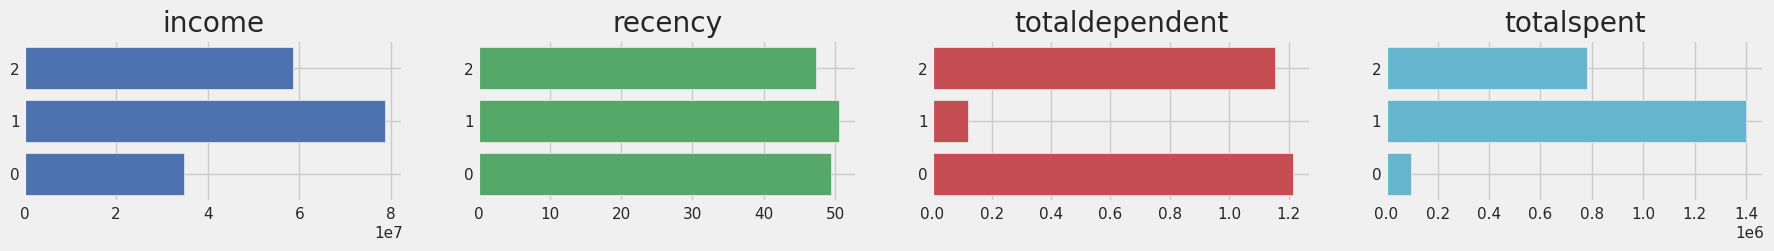

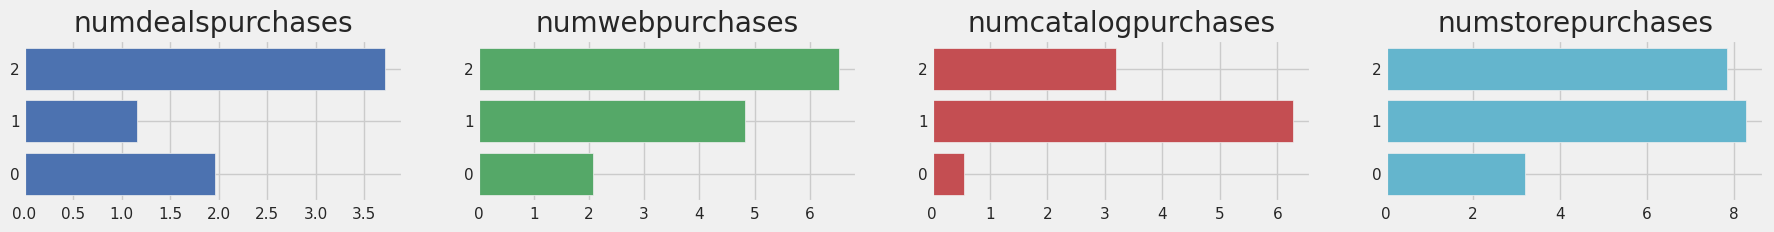

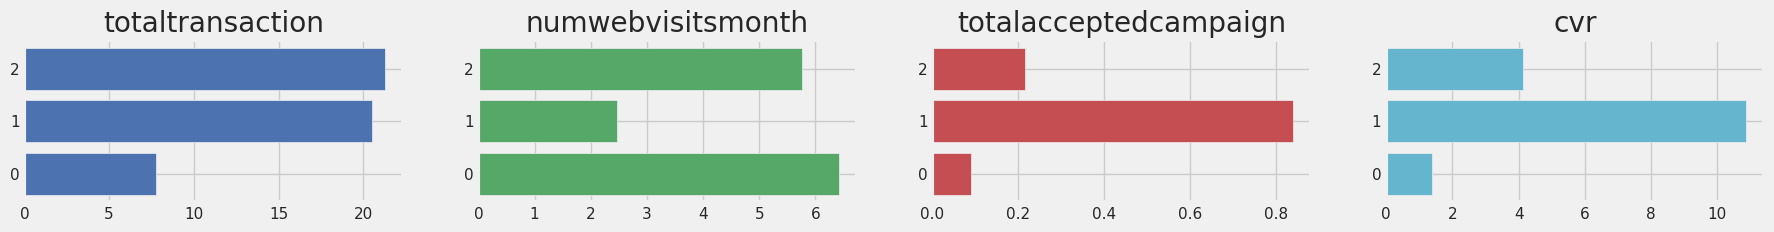

In [ ]:
colm = ['income', 'recency', 'totaldependent','totalspent' ]
colm1 = ['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases'] 
colm2 = [ 'totaltransaction', 'numwebvisitsmonth', 'totalacceptedcampaign', 'cvr']


def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = dataset.groupby('cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1

dist_list(colm)
dist_list(colm1)
dist_list(colm2)

### Business Recommendation 

#### Hasil Clustering
1. **Kelompok 2 (Potential),** Pelanggan yang memiliki income sedang, memiliki tanggungan cenderung tinggi. Pelanggan cenderung menghasilkan pengeluaran pada perusahaan pada tingkat menengah, dan memiliki total transaksi/frekuensi pembelian yang tinggi. Pelanggan pada kelompok 2 sering mengunjungi web pada tiap bulannya, dan lebih banyak menggunakan metode dealspurchases, webpurchases, dan storepurchases. Namun Pelanggan dengan kelompok ini adalah pelanggan yang memiliki total acceptedcampaign dan cvr yang rendah. 

2. **Kelompok 1 (Target),** yaitu pelanggan yang memiliki income tinggi dengan tanggungan yang sedikit, adalah pelanggan yang menghabiskan pengeluaran atau spent pada produk perusahaan yang sangat tinggi. Pelanggan pada kelompok ini memiliki frekuensi transaksi yang cukup tinggi dimana metode yang umumnya mereka gunakan untuk pembelian adalah catalogpurchases dan storepurchase. Pelanggan dengan tipe kelompok ini cenderung jarang mengunjungi web namun memiliki totalacceptedcampaign dan cvr yang sangat tinggi 

3. **Kelompok 0 (High Risk),** yaitu pelanggan yang memiliki income rendah dan tanggungan yang tinggi dimana pelanggan cenderung tidak menghasilkan spent terhadap produk perusahaan. Transaksi yang dilakukan juga memiliki frekuensi yang cenderung rendah, dengan metode yang biasa digunakan catalogpurchases dan storepurchases. Pelanggan pada kelompok ini frekuensi mengunjungi web yang tinggi namun dengan tingkat totalacceptedcampaign dan cvr yang sangat rendah. 
 
Proses Clustering tidak melibatkan karakteristik umur dan recency karena pada ketiga kelompok yang dihasilkan tidak menunjukkan perbedaan signifikan 
Rekomendasi Action 
